In [1]:
import numpy as np
import torch 
import torch.nn as nn
from tqdm import tnrange
import torch.optim as optim
import torch.nn.functional as F
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score

In [2]:
#true = np.load("/media/hdd01/sklee/CA1_clust8-30/data/V_diff_stimseed1.npy")[-20*50000:].reshape(-1,50000)
true = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
test = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output.npz")["test"]
C_syn_e = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output.npz")["C_syn_e"]
C_syn_i = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output.npz")["C_syn_i"]

In [3]:
var_exp = np.empty((20))

for i in tnrange(20):
    var_exp[i] = explained_variance_score(true[i], test[i])
    
print(np.mean(var_exp))
print(np.std(var_exp))

<ipython-input-3-3a9f3280a07a>:3: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(20):


  0%|          | 0/20 [00:00<?, ?it/s]

0.9825728567479516
0.0027310936390855835


In [4]:
C_syn_e_plot = np.zeros((2000))
C_syn_i_plot = np.zeros((200))

for e in range(2000):
    C_syn_e_plot[e] = np.argmax(C_syn_e[:,e])
    
for i in range(200):
    C_syn_i_plot[i] = np.argmax(C_syn_i[:,i])

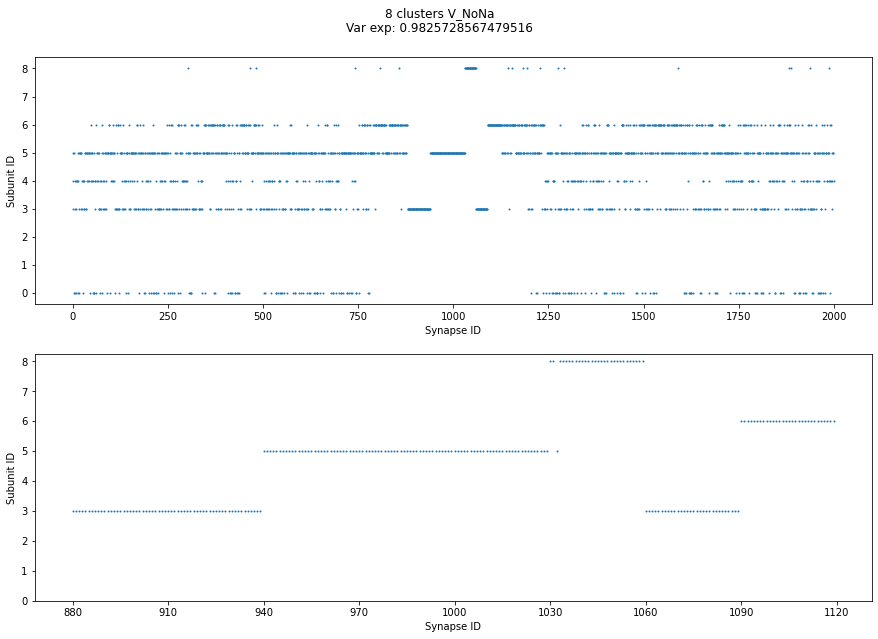

In [6]:
fig, axs = plt.subplots(nrows=2, figsize=(15,10))
axs[0].scatter(np.arange(2000), C_syn_e_plot, s=1)
axs[1].scatter(np.arange(880,1120), C_syn_e_plot[880:1120], s=1)
axs[1].set_xticks(np.arange(880,1121,30))
axs[0].set_ylabel("Subunit ID")
axs[0].set_xlabel("Synapse ID")
axs[1].set_ylabel("Subunit ID")
axs[1].set_xlabel("Synapse ID")
axs[0].set_yticks(np.arange(0,9,1))
axs[1].set_yticks(np.arange(0,9,1))

fig.suptitle("8 clusters V_NoNa\nVar exp: "+str(np.mean(var_exp)), y=0.95)
plt.show()